## Importing required packages

In [1]:
#Installing all the required packages

!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install collections
!pip install gdown

# Importing all the required packages

from collections import Counter
from numpy import mean, std
import numpy as np
from pandas import read_csv
import pandas as pd
import gdown

import copy
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from credit_data_actual_values import substitute

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' comman

### Downloading the data

In [2]:
# Download from Google Drive
url = 'https://drive.google.com/uc?id=' + '1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9' #(URI ID)
output = './german.data' # Destination directory
gdown.download(url, output, quiet=False) 

Downloading...
From: https://drive.google.com/uc?id=1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9
To: /Users/suryabharadwajn/Desktop/Assignments/Week1 Assignment2.1/german.data
100%|██████████| 79.8k/79.8k [00:00<00:00, 3.71MB/s]


'./german.data'

In [3]:
#Load the data using pandas read_csv method
df=read_csv(output, sep=" ", header=None)
#Display the first few rows in the dataframe
df.head()
#df.shape

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
#Download directly from website
df=read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",\
               sep=" ",header=None)
#Display first few rows in the data frame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Data Visualization

In [5]:
# Displaying data in human readable form with method substitute
# Make replica of the data for converting all the attribute values into human readable form
df_vis = copy.deepcopy(df)
# Call the method substitute from credit_data_actual_values.py to display the real world values
df_vis = substitute(df_vis)

In [6]:
# Task1
# Display the first few rows of the data
df_vis.head(2)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk


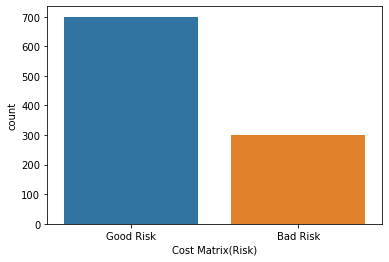

In [7]:
#Task2: Plot the frequency of each label as a histogram

import seaborn as sns

sns.countplot(x= "Cost Matrix(Risk)", data=df_vis)
plt.show()

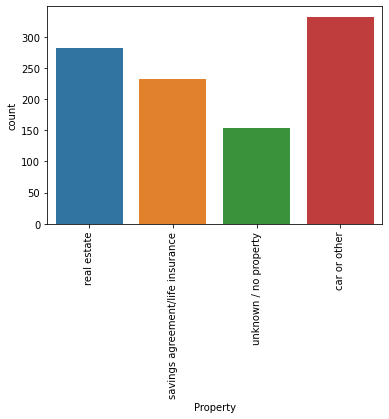

In [8]:
#Task2: Plot the histogram of values from any other attribute of choice

sns.countplot(x= "Property", data=df_vis)
plt.xticks(rotation=90)
plt.show()

## Prepare Data

In [9]:
# split the data frame into inputs and outputs
last_ix = len(df.columns) - 1
X, y = df.drop(last_ix, axis=1), df[last_ix]

In [10]:
# Categorical features has to be converted into integer values for the model to process. 
#This is done through one hot encoding.
# select categorical features
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
# one hot encode categorical features only
ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
X = ct.fit_transform(X)
# label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(y)
print(X.shape, y.shape, Counter(y))

(1000, 61) (1000,) Counter({0: 700, 1: 300})


In [11]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Train the Model

Hyper Parameters for Logistic Regression
1. penalty: Used to specify the norm used in the penalization. 
2. C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
3. max_iter: Maximum number of iterations taken for the solvers to converge.

Epoch: One Epoch is when an entire dataset is passed forward and backward through the classifier / neural network only once.

Iterations: Iterations is the number of batches that is passed forward and backward through the classifier.

In [12]:
# Declaring and training a classifier
# Logistic regression classifier
lr_clf = LogisticRegression(penalty='l2',C=1.0, max_iter=10000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [13]:
# predicting 
from sklearn.metrics import classification_report,confusion_matrix
lr_p=lr_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,lr_p))
# printing classification report
print(classification_report(y_test,lr_p))
print(accuracy_score(y_test,lr_p))

[[121  22]
 [ 32  25]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       143
           1       0.53      0.44      0.48        57

    accuracy                           0.73       200
   macro avg       0.66      0.64      0.65       200
weighted avg       0.72      0.73      0.72       200

0.73


Hyper Parameters for Decision Trees
1. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
 - Gini: The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.
 - Entropy is a measure of information that indicates the disorder of the features with the target.
2. splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
3. max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
4. min_samples_split: The minimum number of samples required to split an internal node

In [14]:
# Decision Tree classifier
dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# predicting 
dt_p=dt_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,dt_p))
# printing classification report
print(classification_report(y_test,dt_p))
print(accuracy_score(y_test,dt_p))

[[109  34]
 [ 30  27]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       143
           1       0.44      0.47      0.46        57

    accuracy                           0.68       200
   macro avg       0.61      0.62      0.62       200
weighted avg       0.69      0.68      0.68       200

0.68


Hyper Parameters for SVM
1. kernel: (‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed') Specifies the kernel type to be used in the algorithm.
2. degree: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
3. gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
4. max_iter: Hard limit on iterations within solver, or -1 for no limit.

In [16]:
# SVM classifier
svm_clf = SVC(kernel='poly', degree=3, max_iter=300000)
svm_clf.fit(X_train, y_train)

SVC(kernel='poly', max_iter=300000)

In [17]:
# predicting 
svm_p=svm_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,svm_p))
# printing classification report
print(classification_report(y_test,svm_p))
print(accuracy_score(y_test,svm_p))



[[142   1]
 [ 53   4]]
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       143
           1       0.80      0.07      0.13        57

    accuracy                           0.73       200
   macro avg       0.76      0.53      0.48       200
weighted avg       0.75      0.73      0.64       200

0.73


Hyper Parameters for LinearRegression:
1. fit_intercept: Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered)
2. normalize: If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

In [18]:
# Linear classifier
lc_reg = LinearRegression()
lc_reg.fit(X_train, y_train)

LinearRegression()

Gaussian Naive Bayes:
The likelihood of the features is assumed to be Gaussian. Paramters are
1. priors: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
2. var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.

In [30]:
# Gaussian Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X, y)

GaussianNB()

In [31]:
# predicting 
nb_p=nb_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,nb_p))
# printing classification report
print(classification_report(y_test,nb_p))
print(accuracy_score(y_test,nb_p))

[[104  39]
 [ 18  39]]
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       143
           1       0.50      0.68      0.58        57

    accuracy                           0.71       200
   macro avg       0.68      0.71      0.68       200
weighted avg       0.75      0.71      0.73       200

0.715


In [25]:
# Task 3
# Fit KNN classifier and find the right number of neighbours that gives best performance.
# Show results for using both Euclidean distance and Manhattan Distance metric for the KNN classifier.

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# We store the classifier in clf variabale and gives the metrics and the best neighbours which fits our models
clf = KNeighborsClassifier(n_neighbors=12, metric="manhattan")
clf.fit(X_train, y_train)
Pred_y = clf.predict(X_test)
print(clf)
print("Score: %0.2f" % clf.score(X_train, y_train))
print("Accuracy of model at k=3 is ", metrics.accuracy_score(y_test, Pred_y))

print()
clf = KNeighborsClassifier(n_neighbors=12, metric="euclidean")
clf.fit(X_train, y_train)
Pred_y = clf.predict(X_test)
print(clf)
print("Score: %0.2f" % clf.score(X_train, y_train))
print("Accuracy of model at k=3 is ", metrics.accuracy_score(y_test, Pred_y))

#We test the accuracy score
n_neighbors=np.arange(3,12)
optimumk=[]
for neighbor in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=neighbor, metric="manhattan")
    knn_clf.fit(X_train, y_train)
    knn_p=knn_clf.predict(X_test)
    acc=accuracy_score(y_test,knn_p)
    optimumk.append(acc)

KNeighborsClassifier(metric='manhattan', n_neighbors=12)
Score: 0.72
Accuracy of model at k=3 is  0.705

KNeighborsClassifier(metric='euclidean', n_neighbors=12)
Score: 0.71
Accuracy of model at k=3 is  0.7


max accuracy is 0.695 when neighbors are 6


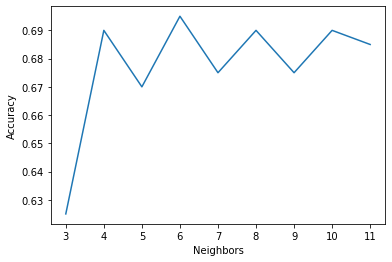

In [26]:
#Plotting Graph
plt.plot(n_neighbors,optimumk)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
print(f'max accuracy is {max(optimumk)} when neighbors are {n_neighbors[optimumk.index(max(optimumk))]}')

In [27]:
# Task 4
# Implement two other classifiers of your choice with sklearn

from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [28]:
# predicting  
ada_p=ada_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,ada_p))
# printing classification report
print(classification_report(y_test,ada_p))
print(accuracy_score(y_test,ada_p))



[[115  28]
 [ 32  25]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       143
           1       0.47      0.44      0.45        57

    accuracy                           0.70       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.69      0.70      0.70       200

0.7


In [32]:
#selecting the best algorithm from all the algorithms based on accuracy
classifier=[lr_clf,dt_clf,svm_clf,knn_clf,ada_clf,nb_clf]
predictions=[lr_p,dt_p,svm_p,knn_p,ada_p,nb_p]


for clf,pred in zip(classifier,predictions):
    print(f'accuracy with {clf.__class__.__name__} : {accuracy_score(y_test,pred)}')




accuracy with LogisticRegression : 0.73
accuracy with DecisionTreeClassifier : 0.68
accuracy with SVC : 0.73
accuracy with KNeighborsClassifier : 0.685
accuracy with AdaBoostClassifier : 0.7
accuracy with GaussianNB : 0.715


## Evaluate the Model

In [33]:
#Predicting for test data
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [34]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [35]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.715
Recall: 0.715
Precision: 0.715
F1-score: 0.6813417190775681


## Visualization of Results

In [36]:
## Task 5: Insert the code for visualizing the comfusion matrix here
#store the confusion matrix in the variable cm with dim:2x2

cm = confusion_matrix(y_test , y_pred)
cm

array([[104,  39],
       [ 18,  39]])

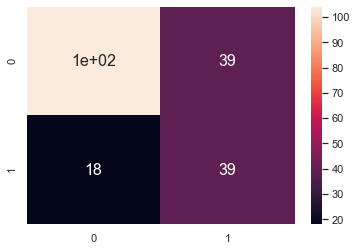

In [37]:
#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#Show the plot
plt.show()

In [38]:
# Final model
model=LogisticRegression(solver='liblinear',class_weight= None,multi_class= 'ovr', 
                  dual=False, penalty= 'l2',C=0.3,max_iter=300000)
# train the model
model.fit(X_train,y_train)

# predicting activity labels
pred_y=model.predict(X_test)

In [39]:
# Task 5: Calculate ROC curve and find fpr, tpr, thresholds

fpr , tpr, thresholds = roc_curve(y_test, y_pred)
tpr

array([0.        , 0.68421053, 1.        ])

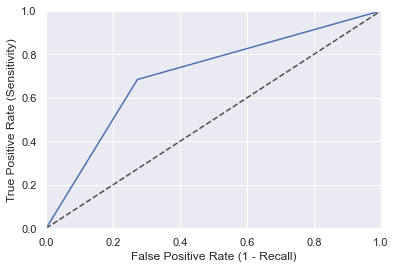



Area Under Curve: 0.71




In [40]:
# Display the values into a plot
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

## K-Fold Validation

In [41]:
# Implement K-fold validation and compare the perfromance with 80-20 random split (using sklearn methods)

import numpy as np
from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
acc=[]
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    trainx,trainy=X[train_index],y[train_index]
    testx,testy=X[test_index],y[test_index]
    model.fit(trainx,trainy)
    pred=model.predict(testx)
    acc.append(accuracy_score(testy,pred))
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
# # report performance
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print(acc)
print(np.mean(acc))



[0.74, 0.79, 0.74, 0.72, 0.735]
0.745


 with k fold cross validation we get an mean accuracy of 74.4 and
 max accuracy of 79%. With normal spilt we get an accuracy of 79.5%.
 But since model was trained 5 timees in K fold, K fold mean of 74.4 is more
  reliable measure of accuracy than normal split of 80:20

In [42]:
#Implement KNN model (not using sklearn).
# We import all the required libraries and our dataset 

import numpy as np
import scipy.spatial
from collections import Counter

In [43]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
output = './german.data'

In [44]:
# We split our model in test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 150, test_size=0.2)

# We declare a class and fit in it
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)

#We declare a class called predict which takes all the parameters and set the distance and append the value in finial output
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)

        return final_output

    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

# We check the score    

clf = KNN(8)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
for i in prediction:
    print(i, end= ' ')

prediction == y_test

clf.score(X_test, y_test)


0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 

0.715

In [48]:
# We find the Accuracy
knn_user = KNN(3)
knn_user.fit(X_train, y_train)

prediction = clf.predict(X_test)

acc=clf.score(X_test, y_test)
print(f'Accuracy with user defined KNN is {acc}')

Accuracy with user defined KNN is 0.715


In [46]:
#Determine the performance metric that best suits this problem statement.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [47]:
# Predicting 
y_pred = clf.predict(X_test)
results = confusion_matrix(y_test, y_pred)
#print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_test, y_pred))
print ('Classification Report : ')
print (classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is',log_loss(y_test, y_pred))



[[124  17]
 [ 40  19]]
Accuracy Score is 0.715
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       141
           1       0.53      0.32      0.40        59

    accuracy                           0.71       200
   macro avg       0.64      0.60      0.61       200
weighted avg       0.69      0.71      0.69       200

AUC-ROC: 0.60073326120928
LOGLOSS Value is 9.84361923833111
